# Dataset de Potabilidad de agua

Crear 3 modelos de clasificación para el dataset de potabilidad de agua, uno para cada tipo de clasificador:

- Tree (DecisionTreeClassifier)
- Random Forest (RandomForestClassifier)
- Gradient Boosting (GradientBoostingClassifier)

## Cargar el dataset

In [32]:
import pandas as pd
df = pd.read_csv("csv/water_potability.csv")

X = df.drop("Potability", axis=1)
y = df["Potability"]

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [33]:
import numpy as np

# Reemplazar los valores nulos por 0
df = df.replace(np.nan, 0)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.000000,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,0.000000,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,0.000000,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Visualización de los datos

Potability
0    1998
1    1278
Name: Potability, dtype: int64


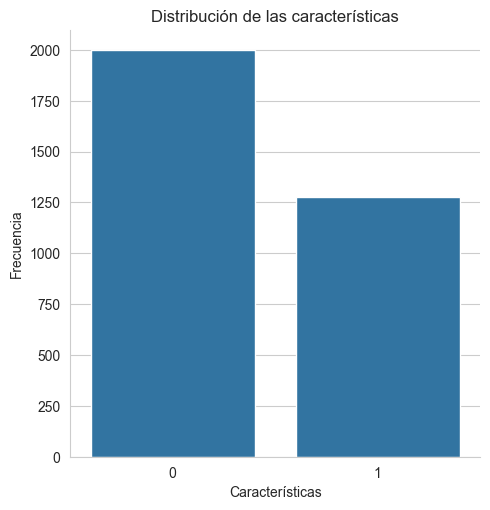

In [34]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style("whitegrid")
print(df["Potability"].groupby(df["Potability"]).size())
sns.catplot(x="Potability", kind="count", data=df)
plt.title("Distribución de las características")
plt.xlabel("Características")
plt.ylabel("Frecuencia")
plt.show()

## Preparación del conjunto de datos

In [35]:
from sklearn.model_selection import train_test_split

p_train = 0.7

train, test = train_test_split(df, test_size=p_train, random_state=42)

# inplace=True: Modifica el dataframe original en lugar de devolver uno nuevo
train.reset_index(inplace=True)
test.reset_index(inplace=True)

print(f"Train: {train.shape}")
print(f"Test: {test.shape}")

print("Conjunto de entrenamiento:")
print(train.head())

print("Conjunto de prueba:")
print(test.head())

Train: (982, 11)
Test: (2294, 11)
Conjunto de entrenamiento:
   index        ph    Hardness        Solids  Chloramines     Sulfate  \
0   3221  4.034063  303.702627  33219.074545     4.425559    0.000000   
1    131  5.033774  155.321478  34971.807483     7.121477  320.115497   
2     77  3.722500  163.639747  37962.167991     6.684570  326.694018   
3   2052  8.297726  222.436321  20320.108453     7.321859  297.138687   
4    724  9.900815  199.083752  16233.134679     8.146643  380.113030   

   Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0    494.320907       13.415230        72.012642   5.024742           1  
1    500.637326       18.312499        63.193306   3.244948           0  
2    467.562973       14.567269        50.577979   3.662838           0  
3    374.119522       15.779233        93.446330   4.166105           0  
4    345.019852       20.386720        73.381488   2.395002           1  
Conjunto de prueba:
   index        ph    Hardness      

## Validación cruzada con RandomizedSearchCV

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Crear los clasificadores
tree_classifier = DecisionTreeClassifier()
rnd_classifier = RandomForestClassifier()
gb_classifier = GradientBoostingClassifier()

# Parámetros para los clasificadores
params = {
    'tree': {
        'max_depth': [16, 12, 8, 4, 2, None], # Profundidad máxima del árbol
        'criterion': ['gini', 'entropy'] # Criterio para medir la calidad de una división
    },
    'rnd': {
        'n_estimators': [4, 8, 16, 32, 64, 128], # Número de árboles en el bosque
        'max_depth': [16, 12, 8, 4, 2, None], # Profundidad máxima del árbol
        'bootstrap': [True, False], # Muestreo con reemplazo o sin reemplazo en la construcción de árboles
        'criterion': ['gini', 'entropy'] # Criterio para medir la calidad de una división
    },
    'gb': {
        'n_estimators': [4, 8, 16, 32, 64, 128], # Número de árboles en el bosque
        'max_depth': [16, 12, 8, 4, 2, None], # Profundidad máxima del árbol
        'learning_rate': [0.1, 0.05, 0.02, 0.01] # Tasa de aprendizaje
    }
}

# RandomizedSearchCV: Búsqueda aleatoria de hiperparámetros
results = {}
for name, classifier in zip(['tree', 'rnd', 'gb'], [tree_classifier, rnd_classifier, gb_classifier]):
    print(f"Clasificador: {name}")
    print(f"{'='*len(name)}")
    result = RandomizedSearchCV(
        estimator=classifier,
        param_distributions=params[name],
        cv=5
    )
    result.fit(X=train.drop(['Potability'], axis=1), y=train['Potability'])
    print(f"Mejores parámetros: {result.best_params_}")
    print()
    results[name] = result

Clasificador: tree
====
Mejores parámetros: {'max_depth': 16, 'criterion': 'gini'}

Clasificador: rnd
===
Mejores parámetros: {'n_estimators': 128, 'max_depth': 16, 'criterion': 'entropy', 'bootstrap': False}

Clasificador: gb
==
Mejores parámetros: {'n_estimators': 64, 'max_depth': 16, 'learning_rate': 0.1}


## Evaluación de los modelos

In [37]:
from sklearn.metrics import classification_report

X_train = train.drop(['Potability'], axis=1)
y_train = train['Potability']
X_test = test.drop(['Potability'], axis=1)
y_test = test['Potability']

# Crear los clasificadores
tree_classifier = DecisionTreeClassifier(**results['tree'].best_params_)
rnd_classifier = RandomForestClassifier(**results['rnd'].best_params_)
gb_classifier = GradientBoostingClassifier(**results['gb'].best_params_)

models = {
    'tree': tree_classifier,
    'rnd': rnd_classifier,
    'gb': gb_classifier
}

# Entrenar los clasificadores
for name, model in models.items():
    model.fit(X_train, y_train)
    
# Evaluar los clasificadores
for name, model in models.items():
    print(f"Clasificador: {name}")
    print(f"=============={'='*len(name)}")
    print(classification_report(y_test, model.predict(X_test)))
    print()

Clasificador: tree
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1405
           1       0.99      0.99      0.99       889

    accuracy                           0.99      2294
   macro avg       0.99      0.99      0.99      2294
weighted avg       0.99      0.99      0.99      2294


Clasificador: rnd
              precision    recall  f1-score   support

           0       0.78      0.94      0.85      1405
           1       0.85      0.58      0.69       889

    accuracy                           0.80      2294
   macro avg       0.81      0.76      0.77      2294
weighted avg       0.80      0.80      0.79      2294


Clasificador: gb
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1405
           1       0.99      0.99      0.99       889

    accuracy                           0.99      2294
   macro avg       0.99      0.99      0.99      2294
weighted avg      

## Matriz de confusión

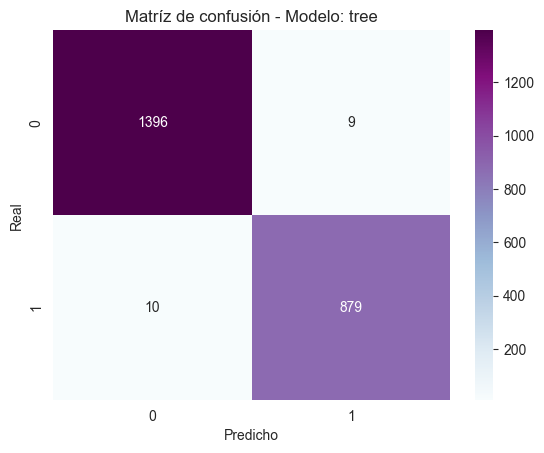

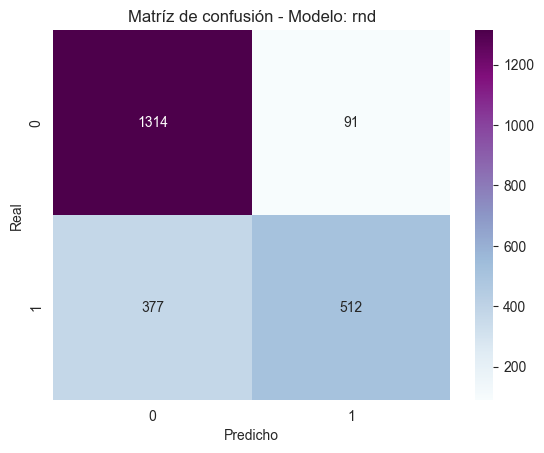

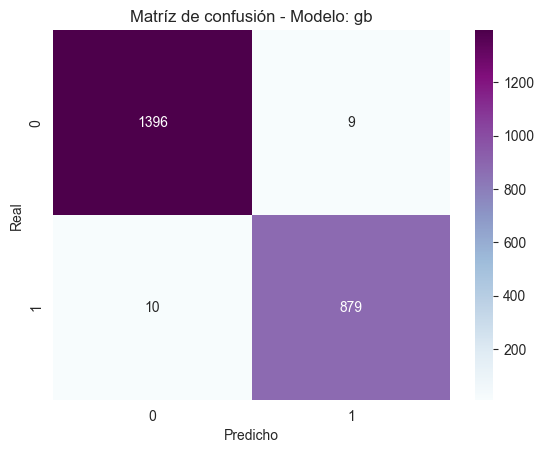

In [38]:
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, cmap='BuPu', fmt='d')
    plt.title(f'Matríz de confusión - Modelo: {name}')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.show()